In [1]:
import sys
import numpy as np
import pyAgrum as gum
%matplotlib inline
from pyAgrum.lib.bn2roc import showROC

In [2]:
bn=gum.loadBN("../resources/alarm.dsl")

In [3]:
# generateCSV from a BN 
import pyAgrum.lib.bn2csv as bn2csv
bn2csv.generateCSV(bn,"learn.csv",10000,True)
bn2csv.generateCSV(bn,"train.csv",1000,True)

 learn.csv : [ ############################################################### ] 100%
Log2-Likelihood : -151305.08478030632

 train.csv : [ ############################################################### ] 100%
Log2-Likelihood : -15358.295404168324



-15358.295404168324

# Learning a BN from learn.csv

In [4]:
# Learning a BN from the database
learner=gum.BNLearner("train.csv")

# # Hill-Climbing
learner.useGreedyHillClimbing()
bn2=learner.learnBN()
bn2.setProperty("name","Learned_{0}s".format(learner.currentTime()))

In [5]:
import pyAgrum.lib.notebook as gnb
gnb.showBN(bn2,size="8",format="svg")

In [6]:
print(bn2.names())

['ANAPHYLAXIS', 'TPR', 'DISCONNECT', 'LVFAILURE', 'HISTORY', 'FIO2', 'ERRCAUTER', 'ERRLOWOUTPUT', 'INSUFFANESTH', 'PULMEMBOLUS', 'PAP', 'MINVOLSET', 'VENTMACH', 'VENTTUBE', 'INTUBATION', 'SHUNT', 'HYPOVOLEMIA', 'STROKEVOLUME', 'LVEDVOLUME', 'PCWP', 'CVP', 'KINKEDTUBE', 'VENTLUNG', 'MINVOL', 'VENTALV', 'ARTCO2', 'EXPCO2', 'PVSAT', 'SAO2', 'CATECHOL', 'HR', 'CO', 'BP', 'HRSAT', 'HREKG', 'HRBP', 'PRESS']


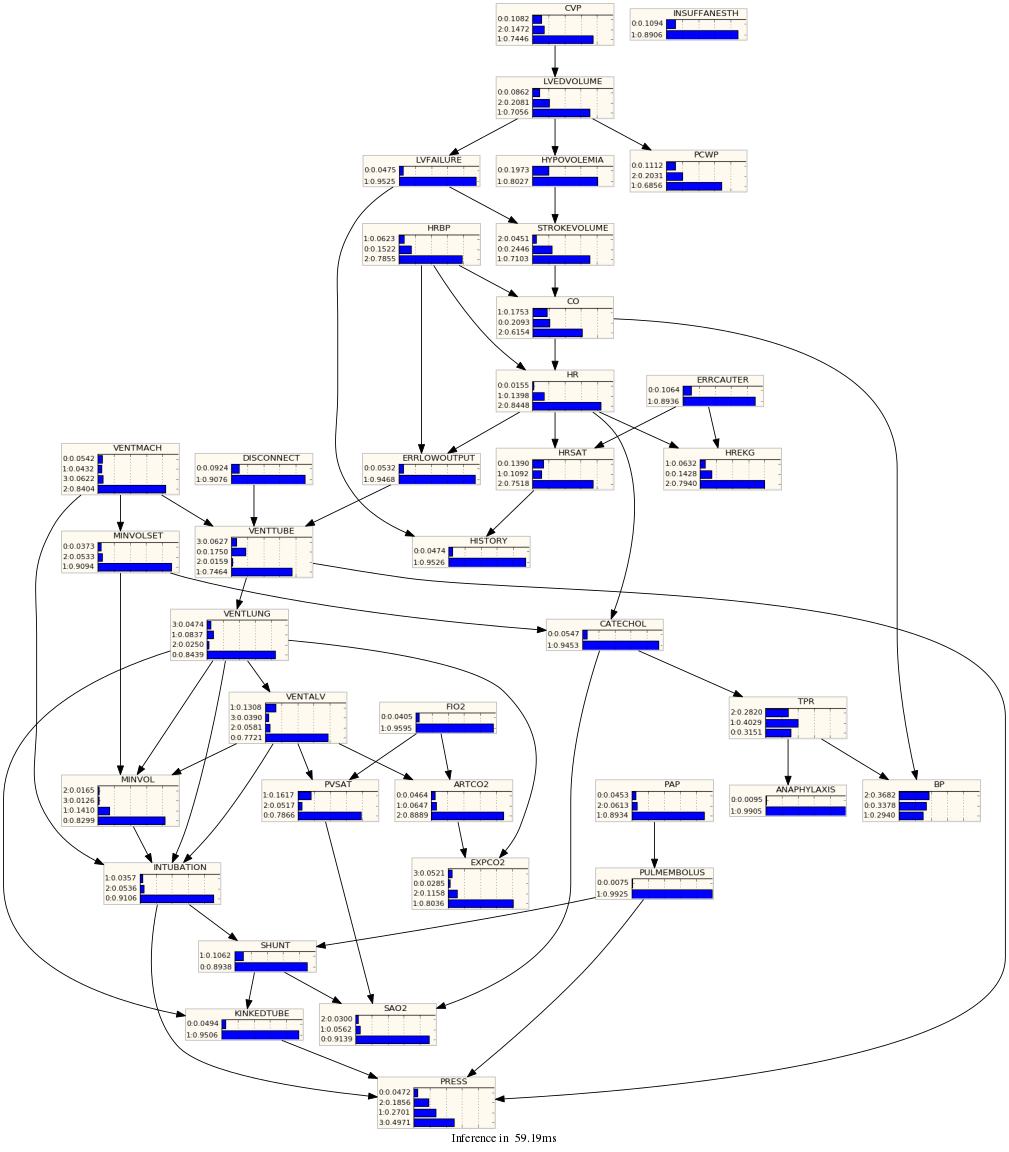

In [7]:
gnb.showInference(bn2,evs={},size="12")

# Two classifiers from the learned BN

In [8]:
print(bn2.variableFromName("HRSAT"))
print(bn2.variableFromName("INTUBATION"))

HRSAT<2,1,0>
INTUBATION<0,2,1>


 train.csv : [ ############################################################### ] 100%
 result in roc_Learned_0.288935s-train.csv-HRSAT-2.png


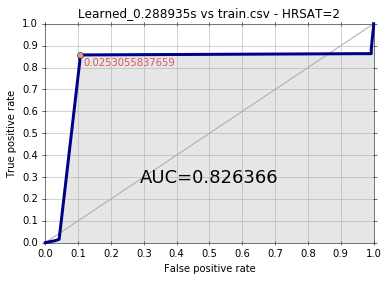

In [9]:
showROC(bn2,"train.csv",'HRSAT',"2",True,True) 

 train.csv : [ ############################################################### ] 100%
 result in roc_Learned_0.288935s-train.csv-INTUBATION-0.png


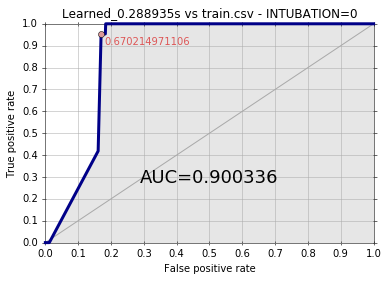

In [10]:
showROC(bn2,"train.csv",'INTUBATION',"0",True,True) 